In [1]:
from pylab import *
import json
import glob
import pandas as pd

In [2]:
def LoadData(File):
    File_open=open(File)
    File_loaded = json.load(File_open)
    Dic = {"File": File,
           "wavenumbers"   : File_loaded['wavenumbers'],
           "intensities"  : File_loaded['intensities']
           }
    return Dic
def IR_exp(IR_data):
    name                = IR_data
    file                = pd.read_csv(name, delimiter='-',decimal=",")
    new_archive         = "{0}_2.csv".format(name[0:-4])
    headerList          = ['wavenumbers', 'intensities']
    file.to_csv(new_archive, header=headerList, index=False)
    file2               = pd.read_csv(new_archive) 
    file2.sort_values(by=['wavenumbers'], inplace=True)
    new_intensities     =[]
    for i in file2['intensities']:
        new_intensities.append(1-i)
    Dic = {"File": name,
           "wavenumbers"   : file2['wavenumbers'],
           "intensities"  : new_intensities
           }
    return Dic

def Normal(data):
    new_intensities = []
    old_intensities = data["intensities"]
    a               = max(old_intensities)
    for i in old_intensities:
        new_intensities.append(i/a)
    return new_intensities

# $H_2O$

In [3]:
glob.glob('./*.json')

['./response_1679610558006_CO2_GF2xTB.json',
 './response_1679607003317_H2O_GFN1xTB.json',
 './response_1679611604838_CO2_GFNFF.json',
 './response_1679611104569_CO2_GFN1xTB.json',
 './response_1679606406055_H2O_GFNFF.json',
 './response_1679607376257_H2O_GFN2xTB.json']

In [4]:
File          ='.\\response_1679606406055_H2O_GFNFF.json'
H2_O_GFNFF    =LoadData(File)
File         ='.\\response_1679607003317_H2O_GFN1xTB.json'
H2_O_GFN1xTB =LoadData(File)
File         = '.\\response_1679607376257_H2O_GFN2xTB.json'
H2_O_GFN2xTB =LoadData(File)
File         ='.\\H2_O_exp.csv'
H2_O_exp     = IR_exp(File)

FileNotFoundError: [Errno 2] No such file or directory: '.\\response_1679606406055_H2O_GFNFF.json'

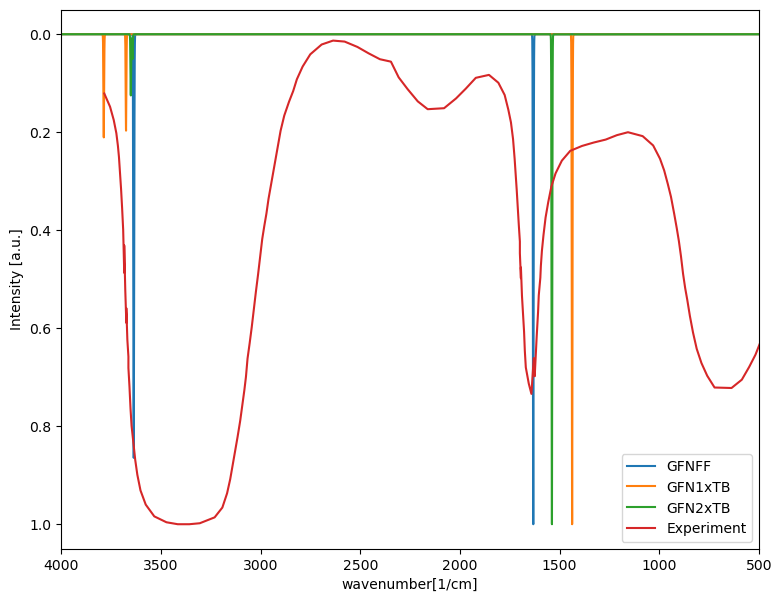

In [39]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(9,7))
    

ax.plot(H2_O_GFNFF['wavenumbers'],Normal(H2_O_GFNFF), label="GFNFF")
ax.plot(H2_O_GFN1xTB['wavenumbers'],Normal(H2_O_GFN1xTB), label="GFN1xTB")
ax.plot(H2_O_GFN2xTB['wavenumbers'],Normal(H2_O_GFN2xTB), label="GFN2xTB")
ax.plot(H2_O_exp['wavenumbers'],Normal(H2_O_exp), label="Experiment")
ax.legend()
ax.set_xlabel("wavenumber[1/cm]")
ax.set_ylabel("Intensity [a.u.]")
ax.set_xlim(500,4000)
ax.invert_yaxis()
ax.invert_xaxis()



# $CO_2$

In [30]:
glob.glob('./*.json')

['.\\EtOH_exp.json',
 '.\\response_1679440595996_CS2_GFNFF.json',
 '.\\response_1679485578314_CS2_GFN1xTB.json',
 '.\\response_1679485961310_CS2_GFN2xTB.json',
 '.\\response_1679606406055_H2O_GFNFF.json',
 '.\\response_1679607003317_H2O_GFN1xTB.json',
 '.\\response_1679607376257_H2O_GFN2xTB.json',
 '.\\response_1679610558006_CO2_GF2xTB.json',
 '.\\response_1679611104569_CO2_GFN1xTB.json',
 '.\\response_1679611604838_CO2_GFNFF.json',
 '.\\response_1679612847840_Ben_GFNFF.json',
 '.\\response_1679613935215_Ben_GFN2xTB.json',
 '.\\response_1679614160476_Ben_GFN1xTB.json',
 '.\\response_1679659777727_POCl_3_GFN1xTB.json',
 '.\\response_1679660569925_POCl_3GFN2xTB.json',
 '.\\response_1679660682243_POCl3_GFNFF.json',
 '.\\response_1679662150668_EtOH_GFNFF.json',
 '.\\response_1679662928012_EtOH_GFN1xTB.json',
 '.\\response_1679663134619_EtOH_GFN2xTB.json']

In [31]:
File          ='.\\response_1679611604838_CO2_GFNFF.json'
CO_2_GFNFF    =LoadData(File)
File         ='.\\response_1679611104569_CO2_GFN1xTB.json'
CO_2_GFN1xTB =LoadData(File)
File         = '.\\response_1679610558006_CO2_GF2xTB.json'
CO_2_GFN2xTB =LoadData(File)
File         ='.\\CO_2.csv'
CO_2_exp     = IR_exp(File)

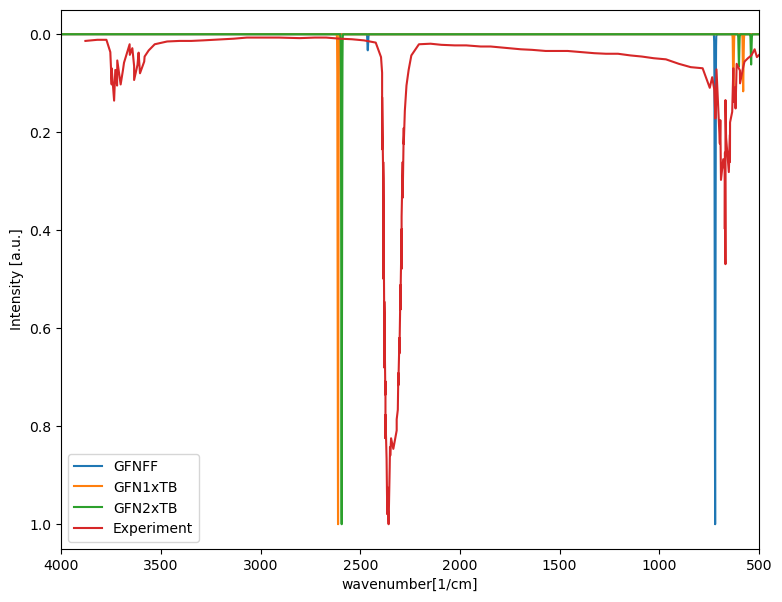

In [40]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(9,7))
    

ax.plot(CO_2_GFNFF['wavenumbers'],Normal(CO_2_GFNFF), label="GFNFF")
ax.plot(CO_2_GFN1xTB['wavenumbers'],Normal(CO_2_GFN1xTB), label="GFN1xTB")
ax.plot(CO_2_GFN2xTB['wavenumbers'],Normal(CO_2_GFN2xTB), label="GFN2xTB")
ax.plot(CO_2_exp['wavenumbers'],Normal(CO_2_exp), label="Experiment")
ax.legend()
ax.set_xlabel("wavenumber[1/cm]")
ax.set_ylabel("Intensity [a.u.]")
ax.set_xlim(500,4000)
ax.invert_yaxis()
ax.invert_xaxis()